# **ANALISI DATI COVID KOREA**

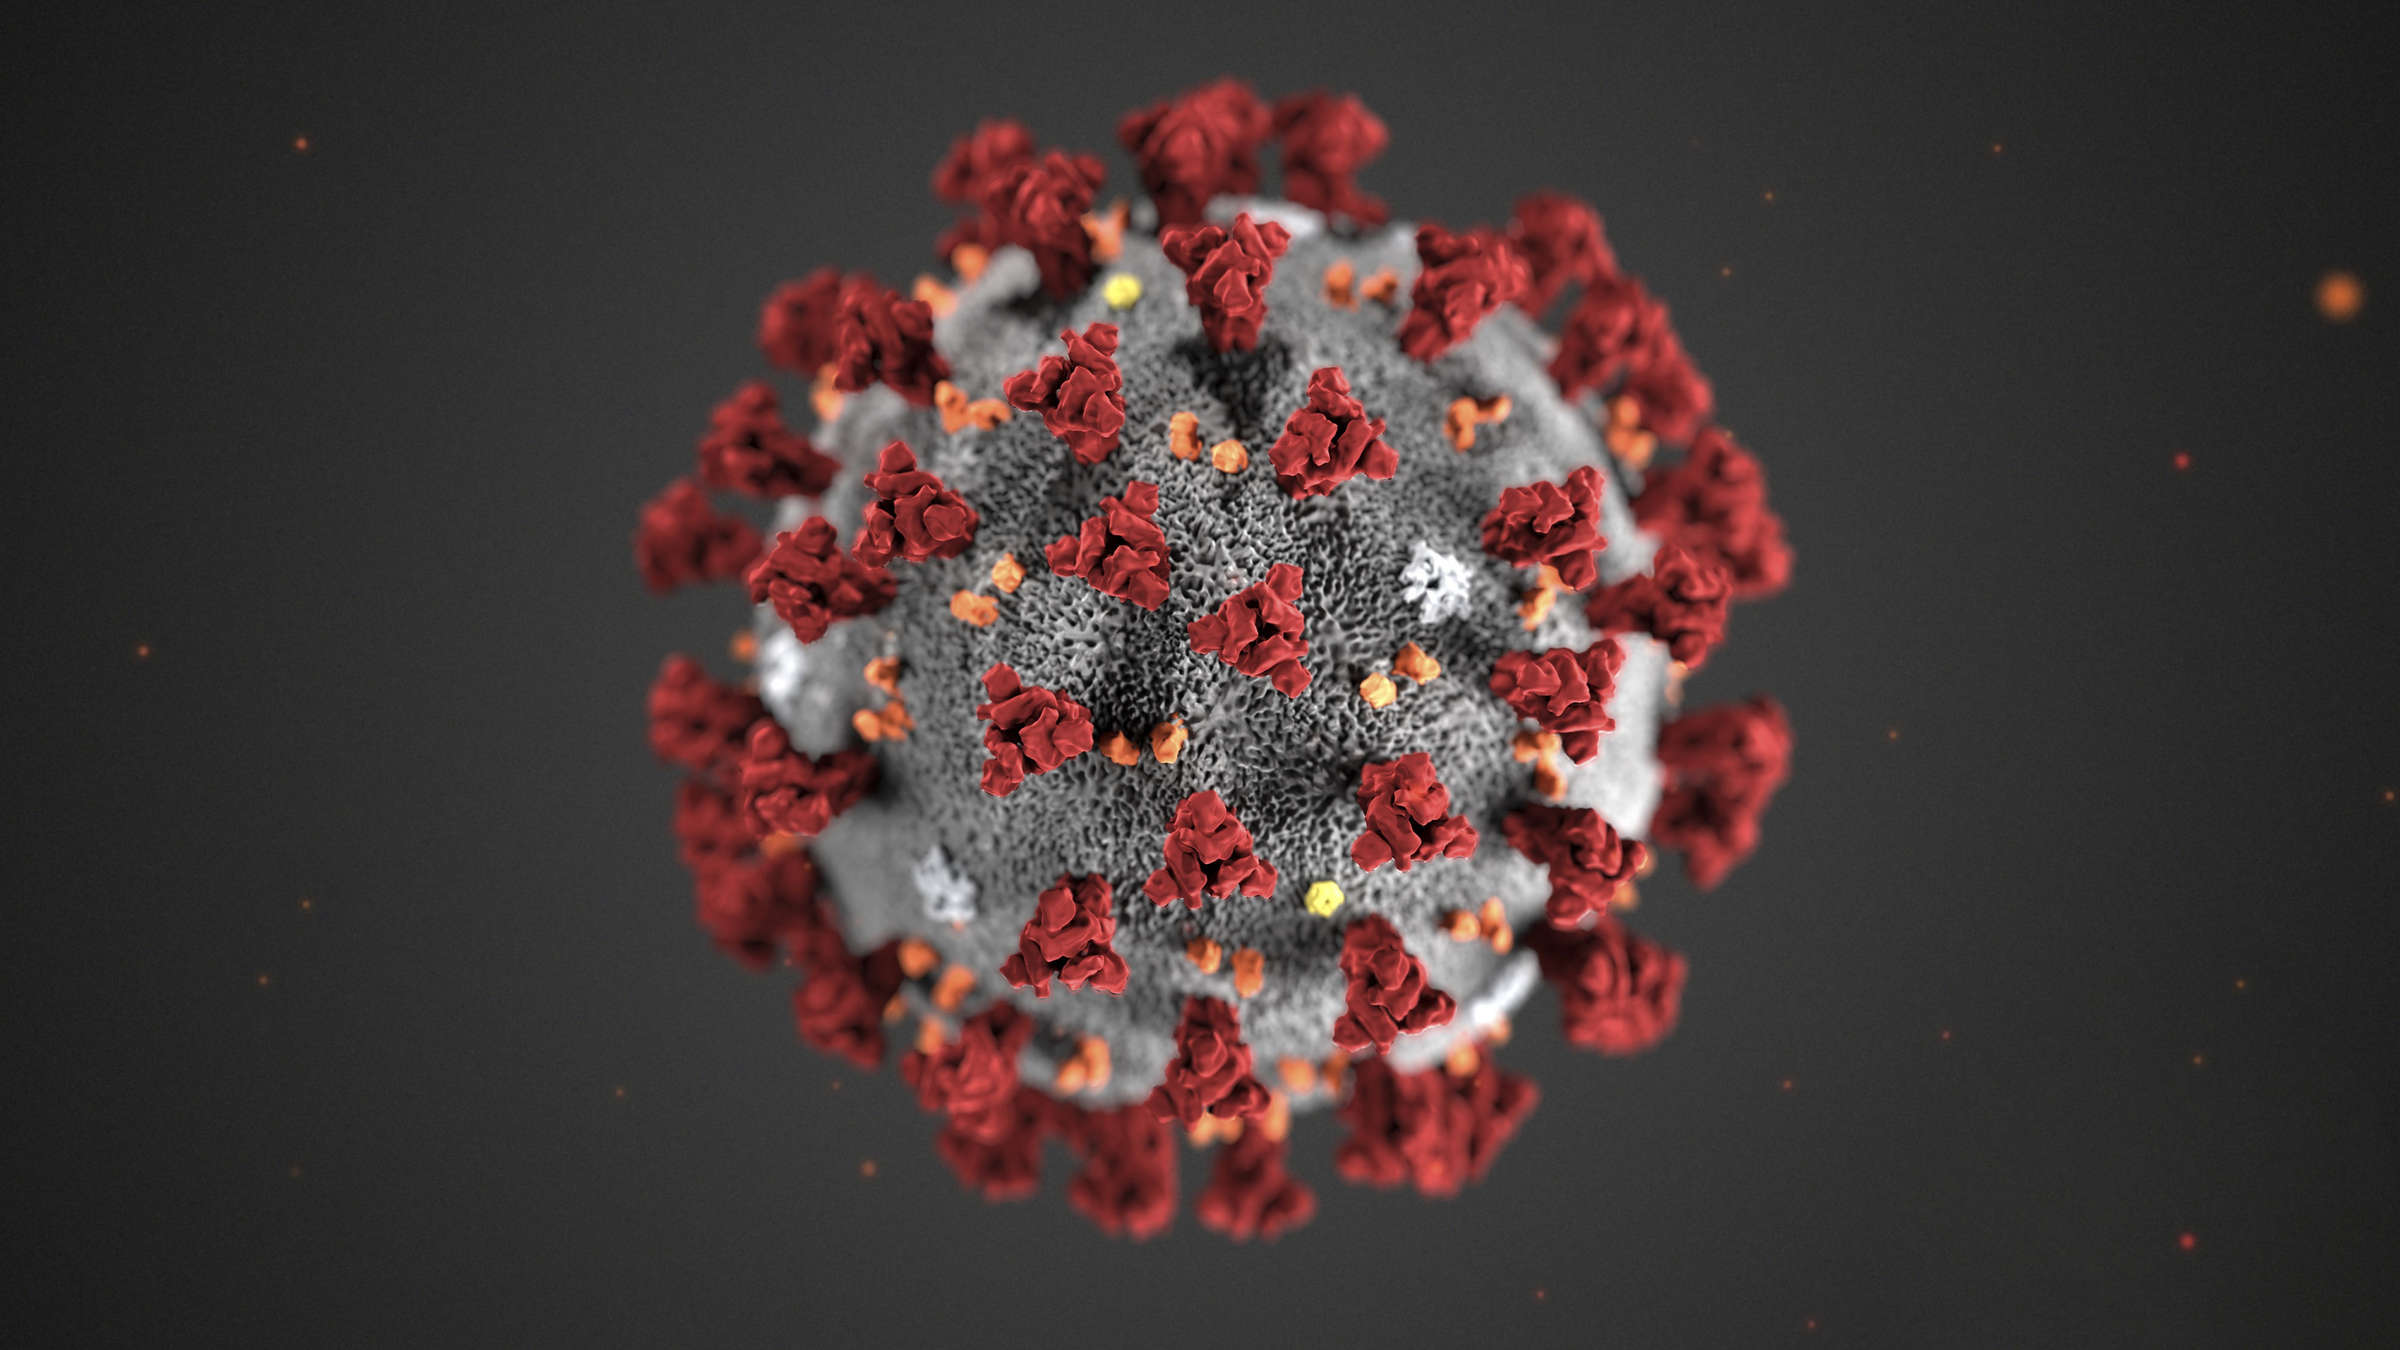

# **Step 1. Importo le librerie e datasets necessari ed ETL**

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import plotly.express as px
import plotly.figure_factory as ff
import warnings
import math
import datetime
from datetime import datetime
warnings.filterwarnings('ignore')
from datetime import datetime
from datetime import timedelta
%matplotlib inline

import folium 
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

from datetime import datetime
import json 
from datetime import datetime

####**Import da Jupyter**

In [ ]:
#import io
#case = p_info = pd.read_csv('Case.csv')
#p_info = pd.read_csv('PatientInfo.csv')
#time = pd.read_csv('Time.csv')
#t_age = pd.read_csv('TimeAge.csv')
#t_gender = pd.read_csv('TimeGender.csv')
#t_province = pd.read_csv('TimeProvince.csv')
#region = pd.read_csv('Region.csv')
#weather = pd.read_csv('Weather.csv')
#search = pd.read_csv('SearchTrend.csv')
#floating = pd.read_csv('SeoulFloating.csv')
#policy = pd.read_csv('Policy.csv')
#population = pd.read_csv('Population_2020.csv')

####**Import da Colab**

In alternativa all utilizzo in jupyter, per fare l'import attraverso Drive bisognerà prima dare consenso all accesso e successivamente salvarsi i vari file csv all'intero di una cartella chiamata 'CovidKorea' nella home page di drive

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import io
case = p_info = pd.read_csv('gdrive/My Drive/CovidKorea/Case.csv',index_col=0)
p_info = pd.read_csv('gdrive/My Drive/CovidKorea/PatientInfo.csv',index_col=0)
time = pd.read_csv('gdrive/My Drive/CovidKorea/Time.csv')
t_age = pd.read_csv('gdrive/My Drive/CovidKorea/TimeAge.csv')
t_gender = pd.read_csv('gdrive/My Drive/CovidKorea/TimeGender.csv')
t_province = pd.read_csv('gdrive/My Drive/CovidKorea/TimeProvince.csv')
region = pd.read_csv('gdrive/My Drive/CovidKorea/Region.csv',index_col=0)
weather = pd.read_csv('gdrive/My Drive/CovidKorea/Weather.csv')
search = pd.read_csv('gdrive/My Drive/CovidKorea/SearchTrend.csv')
floating = pd.read_csv('gdrive/My Drive/CovidKorea/SeoulFloating.csv')
policy = pd.read_csv('gdrive/My Drive/CovidKorea/Policy.csv',index_col=0)
population = pd.read_csv('gdrive/My Drive/CovidKorea/Population_2020.csv')


# **Step 2. Descrizione dei datasets**

- Il significato del colore è che hanno proprietà simili.
- Se una linea è collegata tra le colonne, significa che i valori delle colonne sono parzialmente condivisi.
- Le linee tratteggiate indicano una scarsa rilevanza.
![db_0701](https://user-images.githubusercontent.com/50820635/86225695-8dca0580-bbc5-11ea-9e9b-b0ca33414d8a.PNG)



***


### **Livelli delle divisioni amministrative in Corea del Sud**
> #### Livello superiore (divisioni a livello provinciale)
- **Città Speciale**:
*Seoul*
- **Città Metropolitane**:
*Busan / Daegu / Daejeon / Gwangju / Incheon / Ulsan*
- **Province(-do)**:
*Gyeonggi-do / Gangwon-do / Chungcheongbuk-do / Chungcheongnam-do / Jeollabuk-do / Jeollanam-do / Gyeongsangbuk-do / Gyeongsangnam-do*

> #### Livello inferiore (divisioni a livello comunale)
- **Città(-si)**
[List delle città in Korea](https://en.wikipedia.org/wiki/List_of_cities_in_South_Korea)
- **Paese(-gun)**
[Lista dei Paesi in Korea](https://en.wikipedia.org/wiki/List_of_counties_of_South_Korea)
- **Distretto(-gu)**
[Lista dei distretti in Korea](https://en.wikipedia.org/wiki/List_of_districts_in_South_Korea)

***

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2815958%2F1c50702025f44b0c1ce92460bd2ea3f9%2Fus_hi_30-1.jpg?generation=1582819435038273&amp;alt=media" width=700>

***

##**1) Dati del caso**

> **Case:** dati di casi di infezione da COVID-19 in Corea del Sud



1. case_id: l'ID del caso di infezione
  > - case_id = region_code + case_number
- province: Città Speciale / Città Metropolitana / Provincia (-do)
- city Città (-si) / Paese (-gun) / Distretto (-gu)
- group: TRUE: infezione di gruppo / FALSE: non gruppo
  > - Se il valore è "TRUE" in questa colonna, il valore di "infezioni_casi" indica il nome del gruppo.
  > - I valori denominati "contatto con il paziente", "afflusso dall'estero" e "ecc." Non sono infezioni di gruppo.
  > - Il valore "from another city" significa che dove è iniziata l'infezione di gruppo è un'altra città.
- caso_infezione: il caso di infezione (il nome del gruppo o altri casi)
  > - Il valore "afflusso dall'estero" significa che l'infezione proviene da un altro paese.
  > - Il valore "ecc." Include i casi individuali, i casi in cui la classificazione della pertinenza è in corso dopo l'indagine e i casi sotto inchiesta.
- confirmed: il numero accumulato dei confermati
- latitude: la latitudine del gruppo
- longitude: la longitudine del gruppo

In [ ]:
case.head()

,province,city,group,infection_case,confirmed,latitude,longitude
case_id,,,,,,,
1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [ ]:
case.describe()

,confirmed
count,174.000000
mean,65.488506
std,355.097654
min,0.000000
25%,4.000000
50%,10.000000
75%,31.750000
max,4511.000000


In [ ]:
#Conversione da carattere a valore nil
case.latitude[(case.latitude=='-')]= np.nan
case.longitude[(case.longitude=='-')]= np.nan


In [ ]:
case.head(10)

,province,city,group,infection_case,confirmed,latitude,longitude
case_id,,,,,,,
1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
1000006,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
1000007,Seoul,from other city,True,SMR Newly Planted Churches Group,36,NaN,NaN
1000008,Seoul,Dongdaemun-gu,True,Dongan Church,17,37.592888,127.056766
1000009,Seoul,from other city,True,Coupang Logistics Center,25,NaN,NaN


In [ ]:
case.isnull().sum()

province            0
city                0
group               0
infection_case      0
confirmed           0
latitude          109
longitude         109
dtype: int64

In [ ]:
case["latitude"]=case["latitude"].astype(float)
case["longitude"]=case["longitude"].astype(float)

In [ ]:
case.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 1000001 to 7000004
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province        174 non-null    object 
 1   city            174 non-null    object 
 2   group           174 non-null    bool   
 3   infection_case  174 non-null    object 
 4   confirmed       174 non-null    int64  
 5   latitude        65 non-null     float64
 6   longitude       65 non-null     float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 9.7+ KB


In [ ]:
case.describe()

,confirmed,latitude,longitude
count,174.000000,65.000000,65.000000
mean,65.488506,36.694051,127.584885
std,355.097654,0.911466,0.823087
min,0.000000,35.078825,126.316746
25%,4.000000,35.848190,126.956405
50%,10.000000,37.000354,127.113900
75%,31.750000,37.522331,128.466653
max,4511.000000,37.758635,129.125600


##**2) Dati del paziente**


> **PatientInfo:** dati epidemiologici di pazienti COVID-19 in Corea del Sud



1. Patient_id: l'ID del paziente
  > - Pati_id = codice_regionale + numero_paziente
  > - Esistono due tipi di numero_paziente
      1) local_num: il numero fornito dal governo locale.
      2) global_num: il numero fornito dal KCDC.
- sesso: il sesso del paziente
- età: l'età del paziente
  > - 0 : 0 ~ 9
  > - 10 : 10 ~ 19
  ...
  > - 90: 90 ~ 99
  > - 100 : 100 ~ 109
- paese: il paese del paziente
- provincia: la provincia del paziente
- città: la città del paziente
- Infezione_caso: il caso di infezione
- Infetto_by: l'ID di chi ha infettato il paziente
  > - Questa colonna fa riferimento alla colonna "Patient_id".
- contact_number: il numero di contatti con le persone
- sintom_onset_date: la data di insorgenza dei sintomi
- Confirm_date: la data di conferma
- Release_date: la data di rilascio
- deceased_date: la data del decesso
- state: isolato / rilasciato / deceduto
  > - isolato: essere isolato in ospedale
  > - rilasciato: essere dimesso dall'ospedale
  > - defunto: essere deceduto

In [ ]:
p_info.head()

,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
patient_id,,,,,,,,,,,,,
1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
p_info.describe()

,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
count,4043,3785,5165,5165,5071,4246,1346,791,690,5162,1587,66,5165
unique,2,11,16,17,163,51,606,88,129,148,130,39,3
top,female,20s,Korea,Seoul,Gyeongsan-si,contact with patient,2000000205,3,2020-02-27,2020-03-05,2020-03-20,2020-03-05,released
freq,2218,899,5123,1312,639,1610,51,96,29,145,71,4,2929


In [ ]:
#p_info.dropna(subset=['sex'], inplace=True) # elimina i valori NaN
p_info['age'] =p_info['age'].str.replace('s', '') #sostituisco la 's' a fine numero di età con il campo vuoto

In [ ]:
p_info['age'] =p_info['age'].astype(float) #modifico il tipo da stringa a float

In [ ]:
p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 4043 non-null   object 
 1   age                 3785 non-null   float64
 2   country             5165 non-null   object 
 3   province            5165 non-null   object 
 4   city                5071 non-null   object 
 5   infection_case      4246 non-null   object 
 6   infected_by         1346 non-null   object 
 7   contact_number      791 non-null    object 
 8   symptom_onset_date  690 non-null    object 
 9   confirmed_date      5162 non-null   object 
 10  released_date       1587 non-null   object 
 11  deceased_date       66 non-null     object 
 12  state               5165 non-null   object 
dtypes: float64(1), object(12)
memory usage: 564.9+ KB


In [ ]:
#dei valori mancanti ne faccio un fill con la media decade
media = p_info['age'].mean()
quoziente = int(media)/10
media_decade = quoziente*10
p_info['age']=p_info['age'].fillna(media_decade)

In [ ]:
p_info['age'] =p_info['age'].astype(int) #modifico il tipo da stringa a int

In [ ]:
p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sex                 4043 non-null   object
 1   age                 5165 non-null   int64 
 2   country             5165 non-null   object
 3   province            5165 non-null   object
 4   city                5071 non-null   object
 5   infection_case      4246 non-null   object
 6   infected_by         1346 non-null   object
 7   contact_number      791 non-null    object
 8   symptom_onset_date  690 non-null    object
 9   confirmed_date      5162 non-null   object
 10  released_date       1587 non-null   object
 11  deceased_date       66 non-null     object
 12  state               5165 non-null   object
dtypes: int64(1), object(12)
memory usage: 564.9+ KB


> Le città mancanti vengono riempite con il valore della **moda** della città per la provincia in questione

In [ ]:
p_city = p_info.city.isnull() #vettore con true e false delle varie città mancanti dal dataset

lista_prov = p_info[p_info['city'].isnull()].province.unique().tolist() #creo una lista con le varie province

for prov in lista_prov:
  if prov=='Gwangju': #non abbiamo valori di città per questa provincia, perciò non potremo farne la media
    moda_prov='Gwangju'
  else :
    moda_prov1=p_info[(p_info['province']==prov)].city.mode() #moda delle varie province
    moda_prov=moda_prov1.loc[0]
  i=0
  for cond in p_info['province']==prov:
    if cond:
      if (p_city[p_city.index[i]]).any():
        p_info.city[p_info.index[i]]=moda_prov #riempio quella città mancante con la moda per la provincia
    i=i+1

p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sex                 4043 non-null   object
 1   age                 5165 non-null   int64 
 2   country             5165 non-null   object
 3   province            5165 non-null   object
 4   city                5165 non-null   object
 5   infection_case      4246 non-null   object
 6   infected_by         1346 non-null   object
 7   contact_number      791 non-null    object
 8   symptom_onset_date  690 non-null    object
 9   confirmed_date      5162 non-null   object
 10  released_date       1587 non-null   object
 11  deceased_date       66 non-null     object
 12  state               5165 non-null   object
dtypes: int64(1), object(12)
memory usage: 724.9+ KB


> Sulle colonne vuote della "infection_case" andiamo a dire che non si sono conosciute le cause dell'infezione.

In [ ]:
p_info['infection_case']=p_info['infection_case'].fillna('unknown')

In [ ]:
p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sex                 4043 non-null   object
 1   age                 5165 non-null   int64 
 2   country             5165 non-null   object
 3   province            5165 non-null   object
 4   city                5165 non-null   object
 5   infection_case      5165 non-null   object
 6   infected_by         1346 non-null   object
 7   contact_number      791 non-null    object
 8   symptom_onset_date  690 non-null    object
 9   confirmed_date      5162 non-null   object
 10  released_date       1587 non-null   object
 11  deceased_date       66 non-null     object
 12  state               5165 non-null   object
dtypes: int64(1), object(12)
memory usage: 724.9+ KB


> Sulle colonne vuote della "infected_by" andiamo a scrivere che il paziente non si sà da chi è stato infettato.

In [ ]:
p_info['infected_by']=p_info['infected_by'].fillna('patient not found')
p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sex                 4043 non-null   object
 1   age                 5165 non-null   int64 
 2   country             5165 non-null   object
 3   province            5165 non-null   object
 4   city                5165 non-null   object
 5   infection_case      5165 non-null   object
 6   infected_by         5165 non-null   object
 7   contact_number      791 non-null    object
 8   symptom_onset_date  690 non-null    object
 9   confirmed_date      5162 non-null   object
 10  released_date       1587 non-null   object
 11  deceased_date       66 non-null     object
 12  state               5165 non-null   object
dtypes: int64(1), object(12)
memory usage: 724.9+ KB


> Eliminiamo la colonna "contact_number" dato che sono pochi valori

In [ ]:
p_info.drop('contact_number', axis=1, inplace=True)

In [ ]:
p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sex                 4043 non-null   object
 1   age                 5165 non-null   int64 
 2   country             5165 non-null   object
 3   province            5165 non-null   object
 4   city                5165 non-null   object
 5   infection_case      5165 non-null   object
 6   infected_by         5165 non-null   object
 7   symptom_onset_date  690 non-null    object
 8   confirmed_date      5162 non-null   object
 9   released_date       1587 non-null   object
 10  deceased_date       66 non-null     object
 11  state               5165 non-null   object
dtypes: int64(1), object(11)
memory usage: 684.6+ KB


> Abbia visto nel dataset quali erano le date prima a quelle mancati e quelle successive e, in base a queste, abbiamo riempito tali tre valori mancanti.

In [ ]:
p_info[p_info['confirmed_date'].isnull()].index.tolist() #sulla connfirmed_date mancano tre date nel dataset

[6011000051, 6011000052, 6011000053]

In [ ]:
p_info.loc[6011000050]

sex                                male
age                                  70
country                           Korea
province               Gyeongsangbuk-do
city                          Andong-si
infection_case                      etc
infected_by           patient not found
symptom_onset_date           2020-04-01
confirmed_date               2020-04-04
released_date                       NaN
deceased_date                       NaN
state                          released
Name: 6011000050, dtype: object

In [ ]:
p_info['confirmed_date']=p_info['confirmed_date'].fillna('2020-04-20')

> Media dei giorni in ospedale dopo che il paziente ha confermato il virus

In [ ]:
dateFormatter = "%Y-%m-%d"
p_released= p_info.released_date.isnull()

somma=timedelta(0)
k=0

for i in p_info.index:
  if not p_released[i].any():
    data1 = datetime.strptime(p_info.released_date[i], dateFormatter)
    data2 = datetime.strptime(p_info.confirmed_date[i], dateFormatter)
    diff = data1-data2
    somma = somma + diff
    k = k+1

media_rilascio = somma/k 
media_rilascio


datetime.timedelta(24, 63207, 561437)

In [ ]:
media_rilascio_giorni = timedelta(media_rilascio.days)
media_rilascio_giorni

datetime.timedelta(24)

> La data di rilascio sarà la somma della data di conferma più la media dei giorni di rilascio

In [ ]:
p_state = (p_info.state == 'released') #abbiamo riempito solo le righe 'released'

for i in p_info.index: 
  if p_state[i].any():
    if p_released[i].any():
      data_confirmed = datetime.strptime(p_info.confirmed_date[i], dateFormatter)
      p_info.released_date[i] = data_confirmed + media_rilascio_giorni


Vediamo come coincidono le 'released_date' con le 'released' nel campo "State".

In [ ]:
p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sex                 4043 non-null   object
 1   age                 5165 non-null   int64 
 2   country             5165 non-null   object
 3   province            5165 non-null   object
 4   city                5165 non-null   object
 5   infection_case      5165 non-null   object
 6   infected_by         5165 non-null   object
 7   symptom_onset_date  690 non-null    object
 8   confirmed_date      5165 non-null   object
 9   released_date       2937 non-null   object
 10  deceased_date       66 non-null     object
 11  state               5165 non-null   object
dtypes: int64(1), object(11)
memory usage: 684.6+ KB


> Data di morte **in media** dei pazienti dopo esser stati confermati


In [ ]:
dateFormatter = "%Y-%m-%d"
p_deceased= p_info.deceased_date.isnull()

somma=timedelta(0)
k=0

for i in p_info.index:
  if not p_deceased[i].any():
    data1 = datetime.strptime(p_info.deceased_date[i], dateFormatter)
    data2 = datetime.strptime(p_info.confirmed_date[i], dateFormatter)
    diff_deceased = data1-data2
    somma = somma + diff
    k = k+1

media_morte = somma/k
media_morte

datetime.timedelta(8)

In [ ]:
p_state_death = (p_info.state == 'deceased') #riempiamo solo le righe che nella "State" hanno dicitura 'deceased'

for i in p_info.index: 
  if p_state_death[i].any():
    if p_deceased[i].any():
      data_confirmed = datetime.strptime(p_info.confirmed_date[i], dateFormatter)
      p_info.deceased_date[i] = data_confirmed + media_morte

In [ ]:
p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sex                 4043 non-null   object
 1   age                 5165 non-null   int64 
 2   country             5165 non-null   object
 3   province            5165 non-null   object
 4   city                5165 non-null   object
 5   infection_case      5165 non-null   object
 6   infected_by         5165 non-null   object
 7   symptom_onset_date  690 non-null    object
 8   confirmed_date      5165 non-null   object
 9   released_date       2937 non-null   object
 10  deceased_date       78 non-null     object
 11  state               5165 non-null   object
dtypes: int64(1), object(11)
memory usage: 684.6+ KB


> Trasformo le tre colonne in date

In [ ]:
p_info['released_date']= pd.to_datetime(p_info['released_date'])
p_info['confirmed_date']= pd.to_datetime(p_info['confirmed_date'])
p_info['deceased_date']= pd.to_datetime(p_info['deceased_date'])
p_info['symptom_onset_date']=pd.to_datetime(p_info['symptom_onset_date'], errors='coerce') #coerce serve per togliere un valore mismatched nel dataframe

In [ ]:
p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   sex                 4043 non-null   object        
 1   age                 5165 non-null   int64         
 2   country             5165 non-null   object        
 3   province            5165 non-null   object        
 4   city                5165 non-null   object        
 5   infection_case      5165 non-null   object        
 6   infected_by         5165 non-null   object        
 7   symptom_onset_date  689 non-null    datetime64[ns]
 8   confirmed_date      5165 non-null   datetime64[ns]
 9   released_date       2937 non-null   datetime64[ns]
 10  deceased_date       78 non-null     datetime64[ns]
 11  state               5165 non-null   object        
dtypes: datetime64[ns](4), int64(1), object(7)
memory usage: 684.6+ KB


##**3) Dati di serie storiche**

> **Time:** dati di serie temporali dello stato di COVID-19 in Corea del Sud

> **TimeAge:** dati di serie temporali dello stato COVID-19 in termini di età in Corea del Sud

> **TimeGender:** dati di serie temporali dello stato COVID-19 in termini di genere in Corea del Sud

> **TimeProvince:** dati di serie temporali dello stato COVID-19 in termini di provincia in Corea del Sud

#### 3.1) Dati di serie temporali dello stato di COVID-19 in Corea del Sud
- data: AAAA-MM-GG
- time: Time (0 = AM 12:00 / 16 = PM 04:00)
   > - L'ora in cui KCDC mette a disposizione le informazioni è stata modificata dalle 04:00 alle 12:00 dal 2 marzo.
- test: il numero di test accumulati
   > - Un test è una diagnosi di infezione.
- negativo: il numero accumulato di risultati negativi
- confermato: il numero di risultati positivi accumulati
- rilasciato: il numero accumulato di rilasci
- deceduto: il numero accumulato di decessi

In [ ]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


> Facciamo il casting delle stringhe in date

In [ ]:
time['date']= pd.to_datetime(time['date'])

In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       163 non-null    datetime64[ns]
 1   time       163 non-null    int64         
 2   test       163 non-null    int64         
 3   negative   163 non-null    int64         
 4   confirmed  163 non-null    int64         
 5   released   163 non-null    int64         
 6   deceased   163 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 9.0 KB


#### 3.2) Serie temporali di dati sullo stato del COVID-19 in termini di età in Corea del Sud
- data: AAAA-MM-GG
- time: Time
- età: l'età dei pazienti
- confermato: il numero accumulato dei confermati
- defunto: il numero accumulato dei defunti

In [ ]:
t_age.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


> Facciamo il casting delle stringhe in date

In [ ]:
t_age['date']= pd.to_datetime(t_age['date'])

> Modifichiamo la time age in modo da avete degli interi 

In [ ]:
t_age['age'] =t_age['age'].str.replace('s', '') #sostituisco la 's' a fine numero di età con il campo vuoto

In [ ]:
t_age['age'] =t_age['age'].astype(int) #modifico il tipo da stringa a float

In [ ]:
t_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1089 non-null   datetime64[ns]
 1   time       1089 non-null   int64         
 2   age        1089 non-null   int64         
 3   confirmed  1089 non-null   int64         
 4   deceased   1089 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 42.7 KB


#### 3.3) Serie temporali di dati sullo stato di COVID-19 in termini di sesso in Corea del Sud
- data: AAAA-MM-GG
- time: Time
- sesso: il sesso dei pazienti
- confermato: il numero accumulato dei confermati
- defunto: il numero accumulato dei defunti

In [ ]:
t_gender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


> Facciamo il casting delle stringhe in date

In [ ]:
t_gender['date']= pd.to_datetime(t_gender['date'])

In [ ]:
t_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       242 non-null    datetime64[ns]
 1   time       242 non-null    int64         
 2   sex        242 non-null    object        
 3   confirmed  242 non-null    int64         
 4   deceased   242 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 9.6+ KB


#### 3.4) Serie temporali di dati sullo stato COVID-19 in termini di provincia in Corea del Sud
- data: AAAA-MM-GG
- time: Time
- provincia: la provincia della Corea del Sud
- confermati: il numero accumulato dei confermati nella provincia
   > - Lo status confermato in termini di province è stato presentato dal 21 febbraio.
   > - Il valore prima del 21 febbraio può essere diverso.
- liberati: il numero accumulato dei liberati nella provincia
   > - Dal 5 marzo è stato presentato lo status confermato in termini di province.
   > - Il valore prima del 5 marzo può essere diverso.
- defunto: il numero accumulato dei defunti nella provincia
   > - Dal 5 marzo è stato presentato lo status confermato in termini di province.
   > - Il valore prima del 5 marzo può essere diverso.

In [ ]:
 t_province.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


> Facciamo il casting delle stringhe in date

In [ ]:
t_province['date']= pd.to_datetime(t_province['date'])

In [ ]:
t_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2771 non-null   datetime64[ns]
 1   time       2771 non-null   int64         
 2   province   2771 non-null   object        
 3   confirmed  2771 non-null   int64         
 4   released   2771 non-null   int64         
 5   deceased   2771 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 130.0+ KB


##**4) Dati aggiuntivi**


> **Region:** posizione e dati statistici delle regioni della Corea del Sud

> **Weather:** dati del tempo nelle regioni della Corea del Sud

> **SearchTrend:** dati di tendenza delle parole chiave cercate in NAVER, uno dei più grandi portali della Corea del Sud

> **SeoulFloating:** dati sulla popolazione che è a Seoul ma non è contata nel censimento ufficiale della città.

> **Politicy:** dati della politica del governo per COVID-19 in Corea del Sud

#### 4.1) Posizione e dati statistici delle regioni della Corea del Sud
- codice: il codice della regione
- provincia: Città Speciale / Città Metropolitana / Provincia (-do)
- città: Città (-si) / Paese (-gun) / Distretto (-gu)
- latitudine: la latitudine della visita 
- longitudine: la longitudine della visita
- elementary_school_count: il numero di scuole elementari
- kindergarten_count: il numero di asili
- university_count: il numero di università
- academy_ratio: il rapporto delle accademie
- old_population_ratio: il rapporto tra la popolazione anziana
- senior_alone_ratio: il rapporto tra le famiglie anziane che vivono sole
- nursing_home_count: il numero di case di cura


In [ ]:
region.head()

,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
code,,,,,,,,,,,
10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [ ]:
region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 10000 to 80000
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   province                  244 non-null    object 
 1   city                      244 non-null    object 
 2   latitude                  244 non-null    float64
 3   longitude                 244 non-null    float64
 4   elementary_school_count   244 non-null    int64  
 5   kindergarten_count        244 non-null    int64  
 6   university_count          244 non-null    int64  
 7   academy_ratio             244 non-null    float64
 8   elderly_population_ratio  244 non-null    float64
 9   elderly_alone_ratio       244 non-null    float64
 10  nursing_home_count        244 non-null    int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 22.9+ KB


#### 4.2) Dati del tempo nelle regioni della Corea del Sud
- codice: il codice della regione
- provincia: Città Speciale / Città Metropolitana / Provincia (-do)
- data: AAAA-MM-GG
- avg_temp: la temperatura media
- min_temp: la temperatura più bassa
- max_temp: la temperatura più alta
- precipitazione: la precipitazione giornaliera
- max_wind_speed: la velocità massima del vento
- most_wind_direction: la direzione del vento più frequente
- avg_relative_humidity: l'umidità relativa media



In [ ]:
weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


> Facciamo il casting delle stringhe in date

In [ ]:
weather['date']= pd.to_datetime(weather['date'])

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   code                   26271 non-null  int64         
 1   province               26271 non-null  object        
 2   date                   26271 non-null  datetime64[ns]
 3   avg_temp               26256 non-null  float64       
 4   min_temp               26266 non-null  float64       
 5   max_temp               26268 non-null  float64       
 6   precipitation          26271 non-null  float64       
 7   max_wind_speed         26262 non-null  float64       
 8   most_wind_direction    26242 non-null  float64       
 9   avg_relative_humidity  26251 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.0+ MB


> Andiamo a riempire la colonna *avg_temp* mancanti del dataset con **la media** dei valori calcolati per quella determinata provincia.

In [ ]:
media_prov_avg = weather[(weather['province']==prov)].avg_temp.mean()
media_prov_avg

14.381790499390997

In [ ]:
weather_avg_temp = weather.avg_temp.isnull()

lista_prov1 = weather['province'].unique().tolist()
i=0

for wat in weather_avg_temp:
  if wat:
    prov = weather.province[i]
    media_prov_avg = weather[(weather['province']==prov)].avg_temp.mean()
    weather.avg_temp[i] = media_prov_avg
  i=i+1

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   code                   26271 non-null  int64         
 1   province               26271 non-null  object        
 2   date                   26271 non-null  datetime64[ns]
 3   avg_temp               26271 non-null  float64       
 4   min_temp               26266 non-null  float64       
 5   max_temp               26268 non-null  float64       
 6   precipitation          26271 non-null  float64       
 7   max_wind_speed         26262 non-null  float64       
 8   most_wind_direction    26242 non-null  float64       
 9   avg_relative_humidity  26251 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.0+ MB


> Andiamo a riempire la colonna *min_temp* mancanti del dataset con **la media** dei valori calcolati per quella determinata provincia.

In [ ]:
media_prov_min = weather[(weather['province']==prov)].min_temp.mean()
media_prov_min

8.817417783191235

In [ ]:
weather_min_temp = weather.min_temp.isnull()

lista_prov1 = weather['province'].unique().tolist()
i=0

for wat in weather_min_temp:
  if wat:
    prov = weather.province[i]
    media_prov_min = weather[(weather['province']==prov)].min_temp.mean()
    weather.min_temp[i] = media_prov_min
  i=i+1

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   code                   26271 non-null  int64         
 1   province               26271 non-null  object        
 2   date                   26271 non-null  datetime64[ns]
 3   avg_temp               26271 non-null  float64       
 4   min_temp               26271 non-null  float64       
 5   max_temp               26268 non-null  float64       
 6   precipitation          26271 non-null  float64       
 7   max_wind_speed         26262 non-null  float64       
 8   most_wind_direction    26242 non-null  float64       
 9   avg_relative_humidity  26251 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.0+ MB


> Andiamo a riempire la colonna *max_temp* mancanti del dataset con **la media** dei valori calcolati per quella determinata provincia.

In [ ]:
media_prov_max = weather[(weather['province']==prov)].max_temp.mean()
media_prov_max

17.755

In [ ]:
weather_max_temp = weather.max_temp.isnull()

lista_prov1 = weather['province'].unique().tolist()
i=0

for wat in weather_max_temp:
  if wat:
    prov = weather.province[i]
    media_prov_max = weather[(weather['province']==prov)].max_temp.mean()
    weather.max_temp[i] = media_prov_max
  i=i+1

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   code                   26271 non-null  int64         
 1   province               26271 non-null  object        
 2   date                   26271 non-null  datetime64[ns]
 3   avg_temp               26271 non-null  float64       
 4   min_temp               26271 non-null  float64       
 5   max_temp               26271 non-null  float64       
 6   precipitation          26271 non-null  float64       
 7   max_wind_speed         26262 non-null  float64       
 8   most_wind_direction    26242 non-null  float64       
 9   avg_relative_humidity  26251 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.0+ MB


> Andiamo a riempire la colonna *max_wind_speed* mancanti del dataset con **la media** dei valori calcolati per quella determinata provincia.

In [ ]:
media_prov_max_wind = weather[(weather['province']==prov)].max_wind_speed.mean()
media_prov_max_wind

6.14951278928136

In [ ]:
weather_max_wind_speed = weather.max_wind_speed.isnull()

lista_prov1 = weather['province'].unique().tolist()
i=0

for wat in weather_max_wind_speed:
  if wat:
    prov = weather.province[i]
    media_prov_max_wind = weather[(weather['province']==prov)].max_wind_speed.mean()
    weather.max_wind_speed[i] = media_prov_max_wind
  i=i+1

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   code                   26271 non-null  int64         
 1   province               26271 non-null  object        
 2   date                   26271 non-null  datetime64[ns]
 3   avg_temp               26271 non-null  float64       
 4   min_temp               26271 non-null  float64       
 5   max_temp               26271 non-null  float64       
 6   precipitation          26271 non-null  float64       
 7   max_wind_speed         26271 non-null  float64       
 8   most_wind_direction    26242 non-null  float64       
 9   avg_relative_humidity  26251 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.0+ MB


> Andiamo a riempire la colonna *most_wind_direction* mancanti del dataset con **la media** dei valori calcolati per quella determinata provincia.

In [ ]:
media_prov_most = weather[(weather['province']==prov)].most_wind_direction.mean()
media_prov_most

182.45432399512788

In [ ]:
weather_most_wind_direction = weather.most_wind_direction.isnull()

lista_prov1 = weather['province'].unique().tolist()
i=0

for wat in weather_most_wind_direction:
  if wat:
    prov = weather.province[i]
    media_prov_most = weather[(weather['province']==prov)].most_wind_direction.mean()
    weather.most_wind_direction[i] = media_prov_most
  i=i+1

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   code                   26271 non-null  int64         
 1   province               26271 non-null  object        
 2   date                   26271 non-null  datetime64[ns]
 3   avg_temp               26271 non-null  float64       
 4   min_temp               26271 non-null  float64       
 5   max_temp               26271 non-null  float64       
 6   precipitation          26271 non-null  float64       
 7   max_wind_speed         26271 non-null  float64       
 8   most_wind_direction    26271 non-null  float64       
 9   avg_relative_humidity  26251 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.0+ MB


> Andiamo a riempire la colonna *avg_relative_humidity* mancanti del dataset con **la media** dei valori calcolati per quella determinata provincia.

In [ ]:
media_prov_avg_r = weather[(weather['province']==prov)].avg_relative_humidity.mean()
media_prov_avg_r

62.84190012180312

In [ ]:
weather_avg_relative_humidity= weather.avg_relative_humidity.isnull()

lista_prov1 = weather['province'].unique().tolist()
i=0

for wat in weather_avg_relative_humidity:
  if wat:
    prov = weather.province[i]
    media_prov_avg_r = weather[(weather['province']==prov)].avg_relative_humidity.mean()
    weather.avg_relative_humidity[i] = media_prov_avg_r
  i=i+1

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   code                   26271 non-null  int64         
 1   province               26271 non-null  object        
 2   date                   26271 non-null  datetime64[ns]
 3   avg_temp               26271 non-null  float64       
 4   min_temp               26271 non-null  float64       
 5   max_temp               26271 non-null  float64       
 6   precipitation          26271 non-null  float64       
 7   max_wind_speed         26271 non-null  float64       
 8   most_wind_direction    26271 non-null  float64       
 9   avg_relative_humidity  26271 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.0+ MB


Percentuale delle ricerche della parola "coronavirus" nel corso degli anni all'interno del motore di ricerca sud coreano NAVER

#### 4.3) Dati di tendenza delle parole chiave cercate in NAVER, uno dei più grandi portali della Corea del Sud
- date: AAAA-MM-GG
- cold: il volume di ricerca di "raffreddore" in lingua coreana

- flu: il volume di ricerca di "flu" in lingua coreana

- pneumonia: il volume di ricerca di "polmonite" in lingua coreana

- coronavirus: il volume di ricerca del "coronavirus" in lingua coreana
  



In [ ]:
search.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [ ]:
search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1642 non-null   object 
 1   cold         1642 non-null   float64
 2   flu          1642 non-null   float64
 3   pneumonia    1642 non-null   float64
 4   coronavirus  1642 non-null   float64
dtypes: float64(4), object(1)
memory usage: 64.3+ KB


> Faccio il casting in data

In [ ]:
search['date']= pd.to_datetime(search['date'])

Per ogni giorno e per ogni distretto vedo quante persone sono circolate in quella zona di Seoul per ogni giorno e ogni fascia oraria, per fasce di età e per differenza di genere.

#### 4.4) Dati sulla popolazione fluttuante a Seoul, Corea del Sud (da SK Telecom Big Data Hub)

- date: AAAA-MM-GG
- hour: ora
- birth_year: l'anno di nascita della popolazione fluttuante
- sex: il sesso della popolazione fluttuante
- province: Città Speciale / Città Metropolitana / Provincia (-do)
- city: Città (-si) / Paese (-gun) / Distretto (-gu)
- fp_num: il numero di popolazione fluttuante

In [ ]:
floating.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [ ]:
floating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084800 entries, 0 to 1084799
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   date        1084800 non-null  object
 1   hour        1084800 non-null  int64 
 2   birth_year  1084800 non-null  int64 
 3   sex         1084800 non-null  object
 4   province    1084800 non-null  object
 5   city        1084800 non-null  object
 6   fp_num      1084800 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 57.9+ MB


In [ ]:
floating['date']= pd.to_datetime(floating['date'])

In [ ]:
floating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084800 entries, 0 to 1084799
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   date        1084800 non-null  datetime64[ns]
 1   hour        1084800 non-null  int64         
 2   birth_year  1084800 non-null  int64         
 3   sex         1084800 non-null  object        
 4   province    1084800 non-null  object        
 5   city        1084800 non-null  object        
 6   fp_num      1084800 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 57.9+ MB


#### 4.5) Dati della politica del governo per COVID-19 in Corea del Sud

- policy_id: l'ID della policy
- paese: il paese che ha implementato la politica
- tipo: il tipo di polizza
- gov_policy: la politica del governo
- dettaglio: il dettaglio della polizza
- data_inizio: la data di inizio della polizza
- end_date: la data di fine della polizza

In [ ]:
policy.head()

,country,type,gov_policy,detail,start_date,end_date
policy_id,,,,,,
1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [ ]:
policy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     61 non-null     object
 1   type        61 non-null     object
 2   gov_policy  61 non-null     object
 3   detail      59 non-null     object
 4   start_date  61 non-null     object
 5   end_date    24 non-null     object
dtypes: object(6)
memory usage: 3.3+ KB


> Riempiamo la colonna "detail" con la voce 'not detail'

In [ ]:
policy['detail']=policy['detail'].fillna('not detail')

> Facciamo in casting da stringa di data in data e riempiamo la colonna "end_date" con l'ultima data disponibile nel dataset

In [ ]:
policy['start_date']= pd.to_datetime(policy['start_date'])
policy['end_date']=policy['end_date'].fillna('2020-07-01')
policy['end_date']= pd.to_datetime(policy['end_date'])
policy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   country     61 non-null     object        
 1   type        61 non-null     object        
 2   gov_policy  61 non-null     object        
 3   detail      61 non-null     object        
 4   start_date  61 non-null     datetime64[ns]
 5   end_date    61 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 3.3+ KB
